In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.interpolate import CubicSpline
from itertools import product
from sklearn.metrics import r2_score
import csv
from vmd import VMD
from os import path

In [85]:
# adjusted R-squared
def r2_score_adjusted(y, y_pred, featurecount):
    n = len(y)
    return 1 - (1-r2_score(y, y_pred)) * (n-1)/(n-featurecount-1)

# AIC
def calculate_aic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    aic = n * np.log(sse / n) + 2 * k
    return aic

# BIC
def calculate_bic(y, y_pred, k):
    sse = np.sum((y - y_pred) ** 2)
    n = len(y)
    bic = n * np.log(sse / n) + k * np.log(n)
    return bic

# импорт временного ряда

In [86]:
Trend = list()
t = pd.read_csv(f".\Components\\t6.csv", decimal=',')
Trend = pd.DataFrame(t, dtype=float)
Trend = Trend["Value"]

Noise = list()
n = pd.read_csv(f".\Components\\n1.csv", decimal=',')
noise = pd.DataFrame(n, dtype=float)
Noise.append(noise["Value"])
n = pd.read_csv(f".\Components\\n11.csv", decimal=',')
noise = pd.DataFrame(n, dtype=float)
Noise.append(noise["Value"])

Season = list()
s2 = pd.read_csv(f".\Components\\s2.csv", decimal=',')
season2 = pd.DataFrame(s2, dtype=float)
s3 = pd.read_csv(f".\Components\\s3.csv", decimal=',')
season3 = pd.DataFrame(s3, dtype=float)
s4 = pd.read_csv(f".\Components\\s4.csv", decimal=',')
season4 = pd.DataFrame(s4, dtype=float)
s5 = pd.read_csv(f".\Components\\s5.csv", decimal=',')
season5 = pd.DataFrame(s5, dtype=float)
Season.append(season2['Value'])
Season.append(season2['Value']+season3['Value'])
Season.append(season2['Value']+season4['Value'])
Season.append(season2['Value']+season5['Value'])

In [104]:
index = list()
TS = list()

data = pd.read_csv(f".\Cases\\t6_n1_s2.csv", decimal=',')
df = pd.DataFrame(data, dtype=float)
index = df.index
TS.append(df.values)

for i in range(3,6):
    data = pd.read_csv(f".\Cases\\t6_n1_s2_s{i}.csv", decimal=',')
    df = pd.DataFrame(data, dtype=float)
    TS.append(df.values)

data = pd.read_csv(f".\Cases\\t6_n11_s2.csv", decimal=',')
df = pd.DataFrame(data, dtype=float)
TS.append(df.values)

for i in range(3,6):
    data = pd.read_csv(f".\Cases\\t6_n11_s2_s{i}.csv", decimal=',')
    df = pd.DataFrame(data, dtype=float)
    TS.append(df.values)

In [131]:
TS[7]

array([[-17.9991738 ],
       [-41.50496417],
       [-41.7970228 ],
       ...,
       [ 62.25396496],
       [ 82.22538093],
       [ 48.33633987]], shape=(1500, 1))

In [102]:
np.shape(TS)

(8, 1500, 1)

In [100]:
np.shape(Trend)

(1500,)

In [98]:
TS[0]

array([[-12.96989641],
       [-15.75165165],
       [-16.20564076],
       ...,
       [ 76.7217176 ],
       [ 78.40773121],
       [ 74.69756946]], shape=(1500, 1))

# тестовый анализ

In [106]:
alpha = 1000
init = 1
DC = True
K = 5
tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

u, u_hat, omega = VMD(TS[0], alpha, tau, K, DC, init, tol)

featurecount = 6

Text(0.5, 0, 'X')

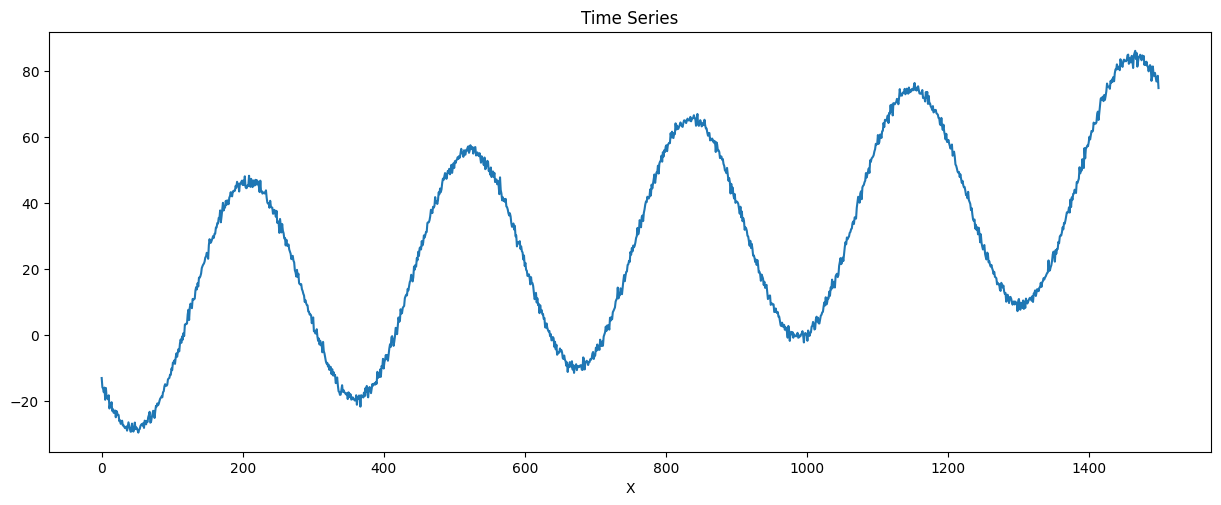

In [108]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, TS[0])
plt.title('Time Series')
plt.xlabel('X')

Text(0.5, 0, 'X')

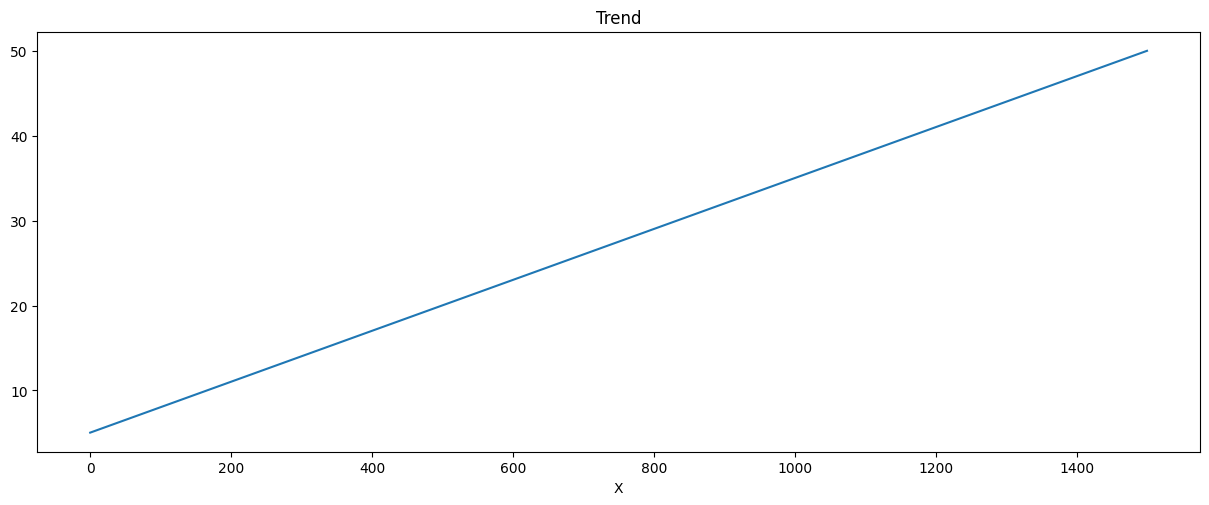

In [110]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, Trend)
plt.title('Trend')
plt.xlabel('X')

In [111]:
featurecount

6

In [113]:
r2_score(Trend, u[0].T)

0.924732983001814

Text(0.5, 0, 'X')

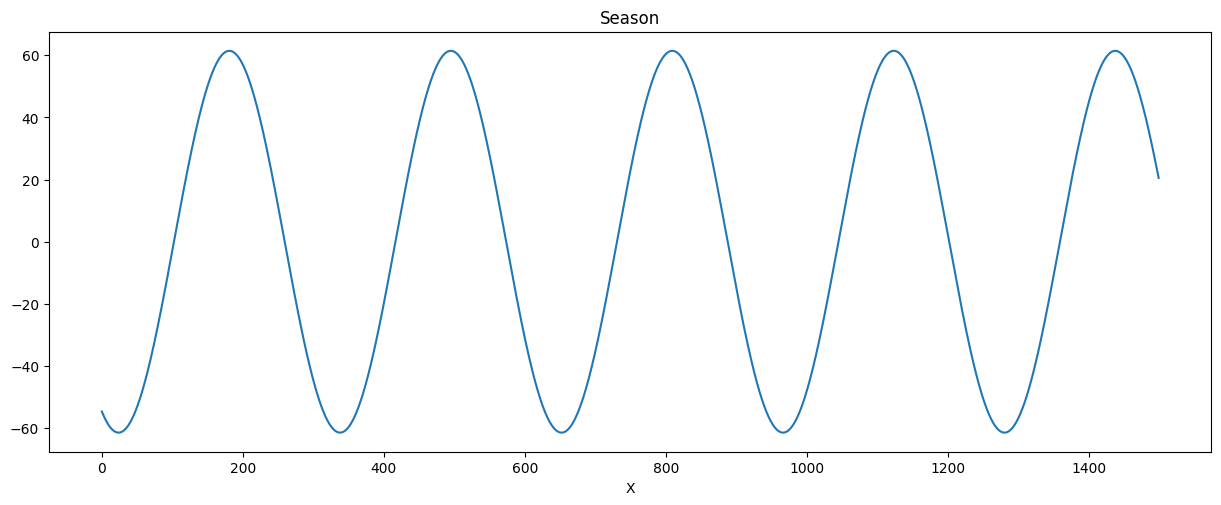

In [123]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
plt.plot(index, Season[1])
plt.title('Season')
plt.xlabel('X')

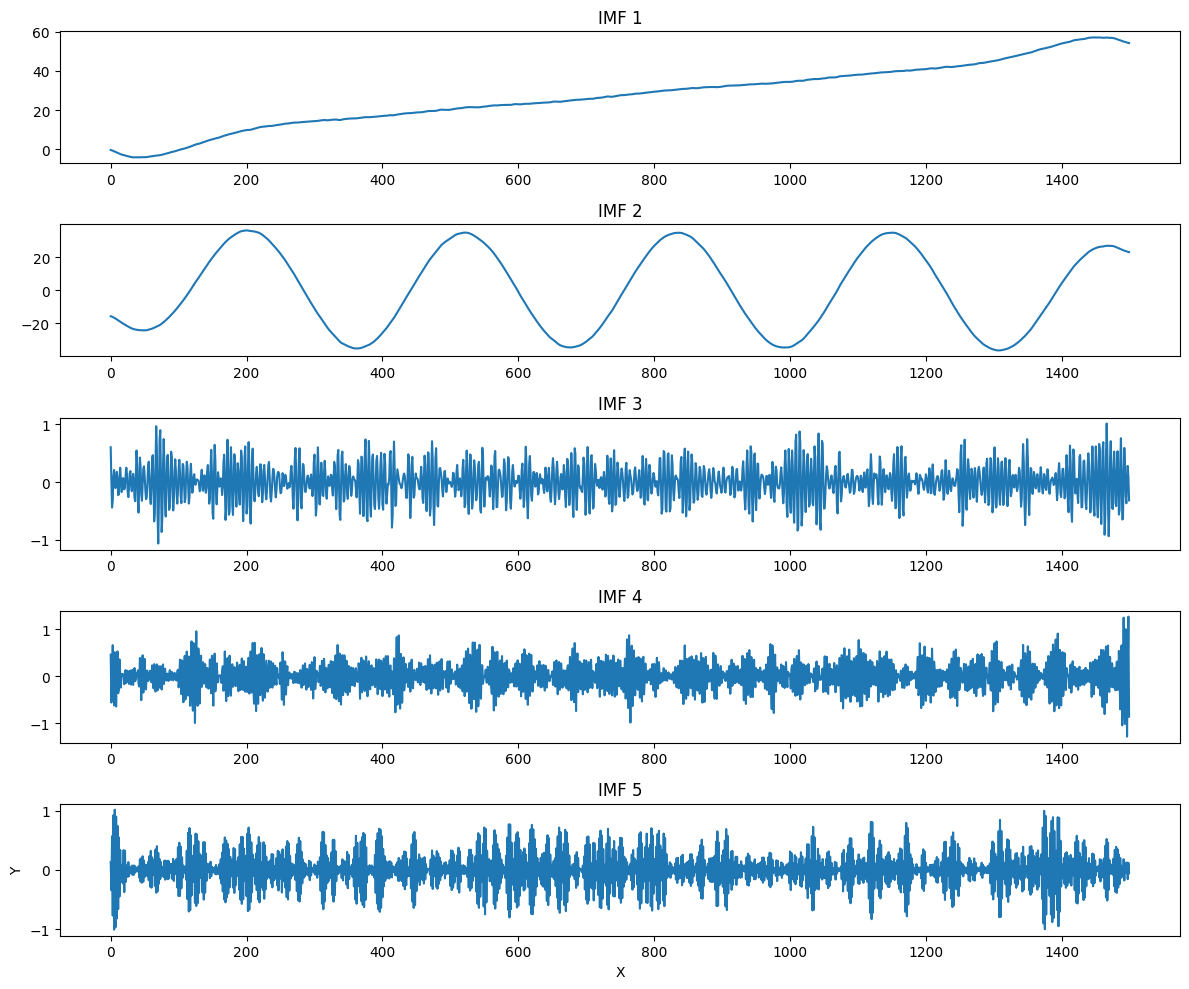

In [125]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range(K):
    axs[i].plot(index, u[i].T)
    axs[i].set_title(f'IMF {i+1}')

plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

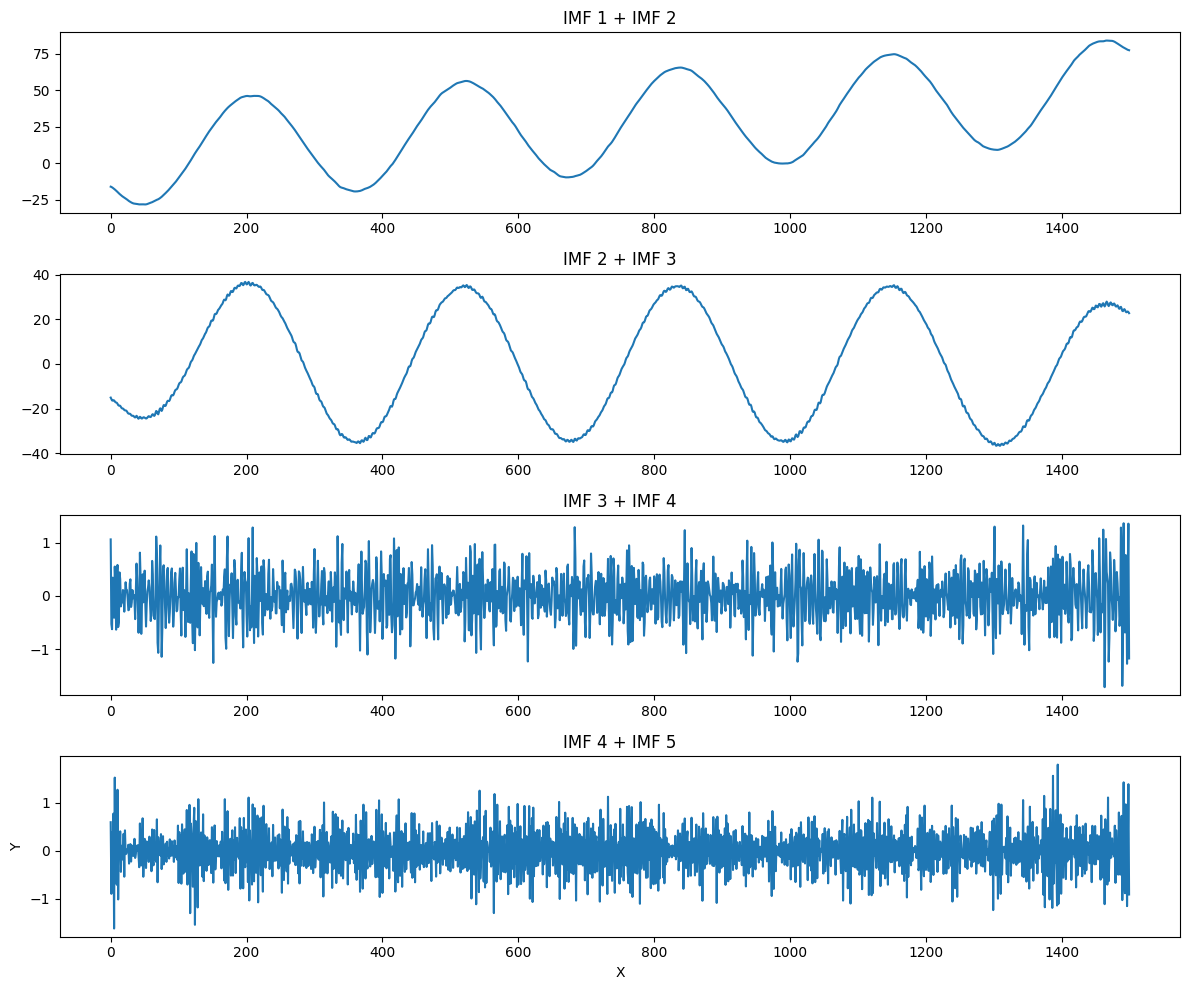

In [129]:
# plt.figure(figsize=(15,12))
# plt.subplot(2,1,1)
# plt.plot(index[0], TS[0])

fig, axs = plt.subplots(figsize=(12,10), nrows=K-1)

# axs[0].set(xlabel = 'date', ylabel='C')
# plt.subplot(2,2,1)
for i in range((K-1)):
    axs[i].plot(index, u[i].T + u[i+1].T)
    axs[i].set_title(f'IMF {i+1} + IMF {i+2}')

# plt.title('IMF')
plt.xlabel('X')
plt.ylabel('Y')
# plt.legend(['Оригинальный сигнал', 'Нижняя огибающая', 'Верхняя огибающая', 'Средняя огибающих'])

plt.tight_layout()

# декомпозиция временного ряда

In [19]:
alpha = (0, 500, 1000, 5000, 10000, 20000)
init = (0, 1, 2)
DC = (False, True)
K = (3, 5, 7)

tau = 0            #BY DEFAULT  
tol = 1e-6         #BY DEFAULT

featurecount = 6

In [ ]:
best_metriks = list()

best_r2_params = list()
best_r2_adj_params = list()
best_aic_params = list()
best_bic_params = list()

# для всех лчм
for ts_i in range(len(TS)):
    best_metriks.append({"Time Series": f"TS{ts_i+1}", "R2": -np.inf, "R2_Adj": -np.inf, "AIC" : np.inf, "BIC": np.inf})

    best_r2_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "R2", "alpha": 0, "tau": tau, "K": 3, "DC": False, "init": 0, "tol": tol, "IMFs" : "1"}) 
    best_r2_adj_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "R2_Adj", "alpha": 0, "tau": tau, "K": 3, "DC": False, "init": 0, "tol": tol, "IMFs" : "1"}) 
    best_aic_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "AIC", "alpha": 0, "tau": tau, "K": 3, "DC": False, "init": 0, "tol": tol, "IMFs" : "1"}) 
    best_bic_params.append({"Time Series": f"TS{ts_i+1}", "Metric": "BIC", "alpha": 0, "tau": tau, "K": 3, "DC": False, "init": 0, "tol": tol, "IMFs" : "1"}) 
    
    # для всех наборов параметров
    for params_set in list(product(alpha, K, DC, init)):
        u, u_hat, omega = VMD(TS[ts_i], params_set[0], tau, params_set[1], params_set[2], params_set[3], tol)
        # best_params = [{"Time Series": f"t{ts_i+1}" ,"alpha": params_set[0], "tau": tau, "K": params_set[1], "DC": params_set[2], "init": params_set[3], "tol": tol}]
        
        k_i = params_set[1]
        for i_imfs in range(k_i):

            sum_of_imfs = 0
            for j in range(i_imfs+1):
                sum_of_imfs += u[j].T

            r2 = r2_score(Trend[ts_i], sum_of_imfs)
            r2_adj = r2_score_adjusted(Trend[ts_i], sum_of_imfs, featurecount)
            aic = calculate_aic(Trend[ts_i], sum_of_imfs, featurecount)
            bic = calculate_bic(Trend[ts_i], sum_of_imfs, featurecount)

            if (r2 > best_metriks[ts_i]["R2"]):
                best_metriks[ts_i]["R2"] = r2

                best_r2_params[ts_i]["alpha"] = params_set[0]
                best_r2_params[ts_i]["K"] = params_set[1]
                best_r2_params[ts_i]["DC"] = params_set[2]
                best_r2_params[ts_i]["init"] = params_set[3]
                best_r2_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (r2_adj > best_metriks[ts_i]["R2_Adj"]):
                best_metriks[ts_i]["R2_Adj"] = r2_adj

                best_r2_adj_params[ts_i]["alpha"] = params_set[0]
                best_r2_adj_params[ts_i]["K"] = params_set[1]
                best_r2_adj_params[ts_i]["DC"] = params_set[2]
                best_r2_adj_params[ts_i]["init"] = params_set[3]
                best_r2_adj_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (aic < best_metriks[ts_i]["AIC"]):
                best_metriks[ts_i]["AIC"] = aic

                best_aic_params[ts_i]["alpha"] = params_set[0]
                best_aic_params[ts_i]["K"] = params_set[1]
                best_aic_params[ts_i]["DC"] = params_set[2]
                best_aic_params[ts_i]["init"] = params_set[3]
                best_aic_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'

            if (bic < best_metriks[ts_i]["BIC"]):
                best_metriks[ts_i]["BIC"] = bic

                best_bic_params[ts_i]["alpha"] = params_set[0]
                best_bic_params[ts_i]["K"] = params_set[1]
                best_bic_params[ts_i]["DC"] = params_set[2]
                best_bic_params[ts_i]["init"] = params_set[3]
                best_bic_params[ts_i]["IMFs"] = f'1 - {i_imfs+1}'


c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:64: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(freqs[T//2:T],(abs(u_hat_plus[n+1, T//2:T, k])**2))/np.sum(abs(u_hat_plus[n+1,T//2:T,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:64: RuntimeWarning: invalid value encountered in divide
  return (f_hat_plus - sum_uk - lambda_hat[n,:]/2)/(1.+Alpha[k]*(freqs - omega_plus[n,k])**2)
c:\Users\George\VS Code Projects\TS Generator\про лчм\vmd.py:67: RuntimeWarning: invalid value encountered in sc

# метрики точности и параметры с выводом

In [ ]:
filename=".\Output\\Best_Metriks-Trend.csv"

fields = best_metriks[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_metriks[ts_i]])  # Write data rows

In [ ]:
filename=".\Output\\Parameters-Trend.csv"

fields = best_r2_params[0].keys()
fields = list(fields)

with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=fields)
    writer.writeheader()  # Write header row
    for ts_i in range(len(TS)):
        writer.writerows([best_r2_params[ts_i]])  # Write data rows
        writer.writerows([best_r2_adj_params[ts_i]])  # Write data rows
        writer.writerows([best_aic_params[ts_i]])  # Write data rows
        writer.writerows([best_bic_params[ts_i]])  # Write data rows

